In [11]:
print hit4hmm2hsp.objects.count()
# s35s = classification.objects.all()
# s35 = s35s[12]

23437


In [30]:

import matplotlib
matplotlib.use("Agg")
from matplotlib import pyplot as plt
%matplotlib inline

import os
os.environ["SEQlib"] = '/data/sequence-data'


In [21]:
import re
p_hmmlen = re.compile('LENG  (\d+)\n')

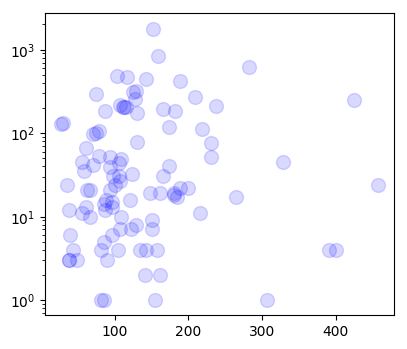

In [34]:
xs = []
ys = []
for hmm in hmms:
    hmm_text = hmm.text
    y = hmm.hits.count()
    if y:
        xs += [int(p_hmmlen.findall(hmm_text)[0])]
        ys += [ y ]
    
kwargs = {}
    
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
ax1.set_yscale('log')
points = ax1.scatter(xs,ys, 
    # colors,
    edgecolor = 'b',facecolor = 'b',
    # edgecolor = 'r',facecolor = 'r',
    marker ='o',
    # c = colors,
     s =100,
     alpha = 0.15,
     # **kwargs
     )


In [48]:
np.array( hmms).size
# hmms[0]

100

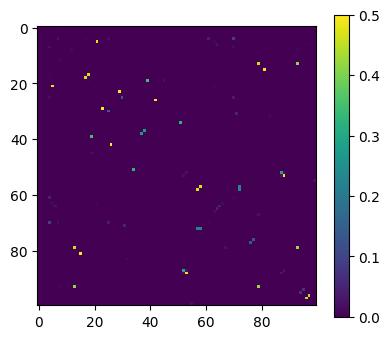

In [91]:
from scipy.spatial.distance import *
# def ISS(us,vs):
# #     u.hits
#     D = []
#     for ui,u in enumerate(us):
#         for v in vs[ui:]:
#             D.append(0)
# #             D.append(u.)
# #             D.append(0)
#     D = squareform(D)
# #     print D.dims
#     return D


def ISS(u,v):
    u = u[0]; v = v[0]
#     print u[0]
    d = float((u.hits.all() & v.hits.all() ).count())/ (u.hits.count() * v.hits.count() + 1)
#     d = u.hits.count()
    return d
X = np.expand_dims(np.array(hmms), axis = 1)
us = X
vs = X
# x =
# D = []
# for ui,u in enumerate(us):
#     for v in vs[ui:]:
#         D.append(0)
# D = squareform(D)
# # print D.dims

dm = pdist( X, ISS)
D = squareform(dm)
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
imDmat = ax1.imshow(D)
plt.colorbar(imDmat)
# X.shape
# dm = cdist( X.T,X.T, ISS)
# np.array(list(hmms))

/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


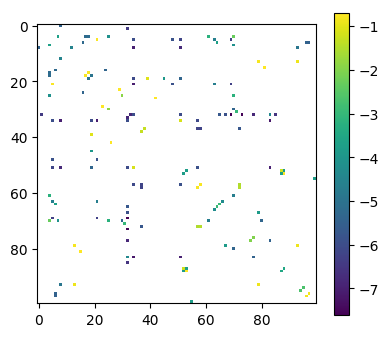

In [92]:
plt.close()
siz = [450,400]
DPI=100.
fig = plt.figure(figsize = [x/float(DPI) for x in siz], dpi=DPI)
ax1 = fig.add_subplot(111,**kwargs)
imdata = np.log(D)
imDmat = ax1.imshow(imdata)
plt.colorbar(imDmat)

In [138]:
hmm1.hit4hmm2hsp_set

In [152]:
# hmm1.hits.count()
# hmm2.hits.count()

4

In [167]:
hmm1.hits.all().count()

310

In [179]:
# os.path.isfile(full("$PDBlib/1a41A01"))


False

In [189]:
inter_hitseq = hmm1.hits.all() & hmm2.hits.all()
hits1 = hmm1.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
hits2 = hmm2.hit4hmm2hsp_set.filter(target__in = inter_hitseq)
fmt = "%s,\t domain:%s\t length:%s,\t hitnum:%d"
print "intersection count is",inter_hitseq.count()
print  fmt %(hmm1,hmm1.cath_node.domain, p_hmmlen.findall(hmm1.text)[0], hmm1.hits.count() )
print fmt % (hmm2,hmm2.cath_node.domain, p_hmmlen.findall(hmm2.text)[0], hmm2.hits.count() )
for i,j in zip(hits1,hits2):
    try:
        node =  domain.objects.get(domain_id = i.target.acc).classification
    except:
        node = ''
    print i.target.acc,i.bitscore,j.bitscore
    print node
    print i.start,j.start
    print i.end,j.end

import subprocess
tmpdir = "/tmp/prc"
prcfmt = "http://update.cathdb.info/api/data/hmm/%s.prc"
dom  = hmm1.cath_node.domain
subprocess.check_call(["wget",prcfmt%dom,"-O","%s/%s.prc"%(tmpdir,dom)])
dom =  hmm2.cath_node.domain
subprocess.check_call(["wget",prcfmt%dom,"-O","%s/%s.prc"%(tmpdir,dom)])


intersection count is 4
HMM for 4.10.470.10.10.0 ,	 domain:1abrA02	 length:143,	 hitnum:4
HMM for 1.10.443.10.2.0 ,	 domain:1ae9A00	 length:134,	 hitnum:4
1a31A03 210.5 198.3
3.90.15.10.1.0
0 10
150 150
1k4tA03 207.6 198.1
3.90.15.10.3.0
0 9
149 149
1r49A03 204.8 195.5

0 9
149 149
1a41A01 94.3 96.6
3.90.15.10.2.0
0 2
135 135


0

In [188]:
def largest_indices(ary, n):
    """Returns the n largest indices from a numpy array."""
    flat = ary.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, ary.shape)
# D[largest_indices(D,10)]
tD = np.triu(D)
lst = zip(*largest_indices(tD,10))
c = counter(lst,per = 1)
for idxx,idxy in lst:
    c.count()
#     print
    hmm1 = X.flat[idxx]
    hmm2 = X.flat[idxy]
    print X.flat[idxx]
    print X.flat[idxy]
    print D[idxx,idxy]
    print hmm1.hits.count() + hmm2.hits.count()
    if c.i == 2:
        break


0 of 10
HMM for 3.30.190.20.3.0 
HMM for 2.60.120.170.2.0 
0.5
38
1 of 10
HMM for 4.10.470.10.10.0 
HMM for 1.10.443.10.2.0 
0.5
8


In [194]:
print '\n'.join(hmm1.text.splitlines()[:10])
print 
print '\n'.join(hmm2.text.splitlines()[:10])

HMMER3/f [3.1b1 | May 2013]
NAME  cath|4_1_0|1a31A03/431-580
LENG  143
ALPH  amino
RF    yes
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Tue Apr 21 23:41:59 2015

HMMER3/f [3.1b1 | May 2013]
NAME  cath|4_1_0|1a41A01/81-216
LENG  134
ALPH  amino
RF    yes
MM    no
CONS  yes
CS    no
MAP   yes
DATE  Tue Apr 21 23:40:47 2015


In [117]:
# np.meshgrid(X,X.T)
# X.T.shape

TypeError: unsupported operand type(s) for *: 'HMMprofile' and 'int'

In [17]:
hmms = HMMprofile.objects.all()[:100]

In [9]:
# from tst.domutil.util import *
# from tst.utils_db import *

# # hmm = s35.hmmprofile_set.first()
# hmms = HMMprofile.objects.all()
# hmm = hmms[6]
# hmm.cath_node

# # print hmm.text

# seqDB_curr = seqDB.objects.get(name = 'CATH')
# seqDB_file = "$SEQlib/cath-domain-seqs-S100.fa"

# q_hits = hmmsearch(hmm,
# seqDB_curr = seqDB_curr,
# seqDB_file = seqDB_file,
# tmpdir = "/tmp/tmp2"                
# )

# oldhits = hmm.hit4hmm2hsp_set.all()
# for hit in q_hits:
#     hsp = hit[0] ### Assume only one dom per hit
#     jdict = hsp2jdict(hsp, query = hmm )
#     jdict["target_id"] = sequence.objects.get( acc = jdict["target_id"]).id

#     if not oldhits.filter(**jdict).exists():
#         hit_db = hit4hmm2hsp(**jdict)
#         hit_db.save()

# # print hmm